### KNN (K-Nearest Neighbors) Lab

In this lab we will attempt to classify, whether or not a wine is HIGH or LOW quality. This is a classification task since we will attempt to discrimnate between these two options.  To do so, we will take as input features of each wine and previous labels of HIGH or LOW quality.

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline


# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


#### Classifying high quality wines
- In this dataset, `quality` is a numeric column, if we were performing regression, we could predict this value.
- Since we are performing classification, we will predict `high_quality` which is 1 or 0, a binary label.
- What is the baseline accuracy that we should attempt to beat?

In [47]:
df.high_quality.mean()

0.19655225488687086

*We want to beat 50/50 odds (.5)* *actually, we want to beat 80% because that is how many low-quality we have*

In [3]:
# TODO

#### What features are important to predict high quality wines?
- Let's explore the dataset

In [3]:
# TODO
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
is_red                  float64
high_quality            float64
dtype: object

In [8]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [9]:
wine = df.drop(['color', 'quality'], axis=1)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

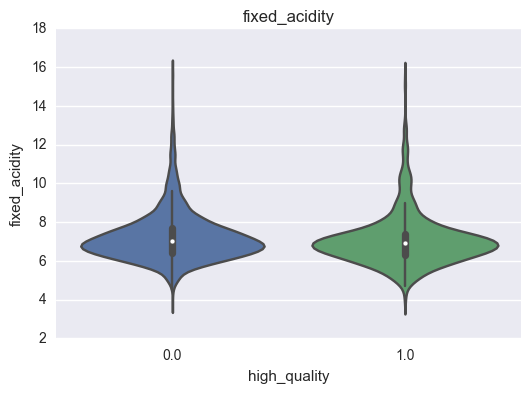

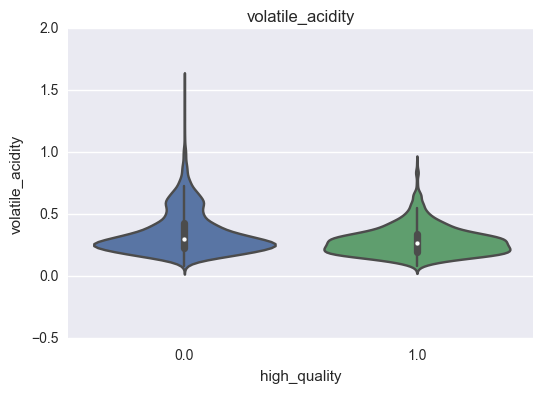

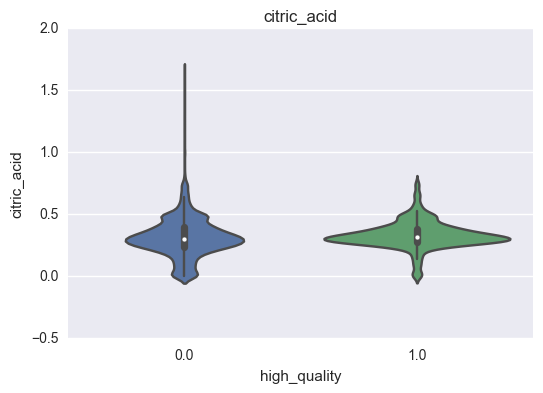

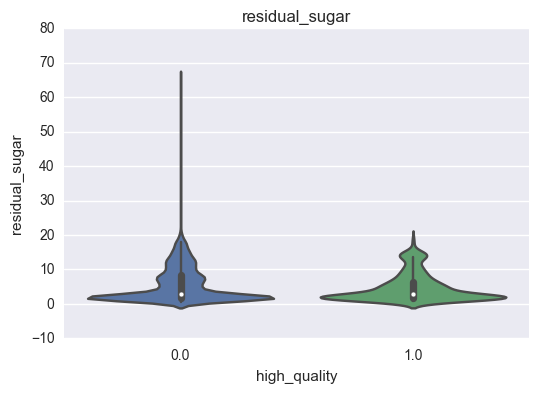

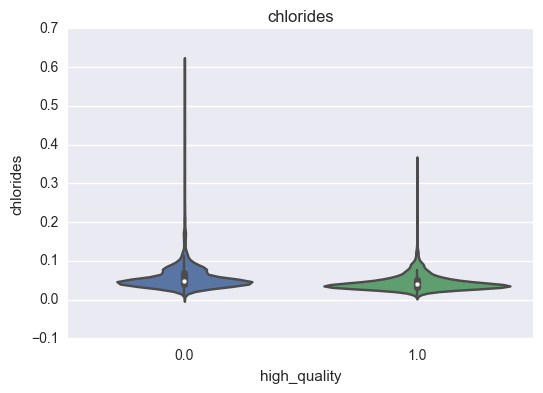

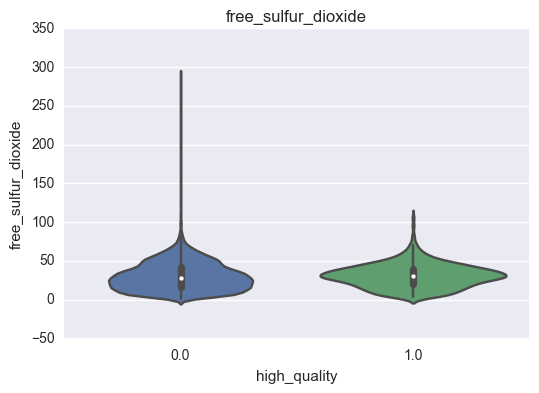

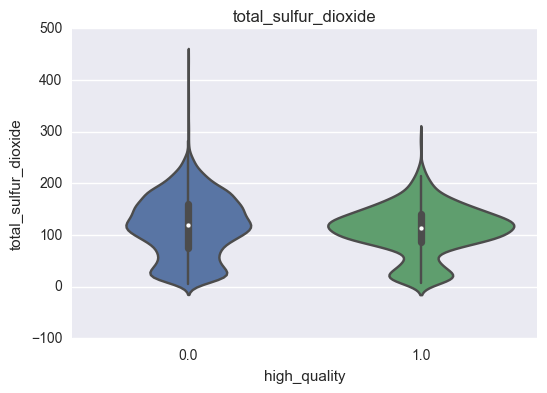

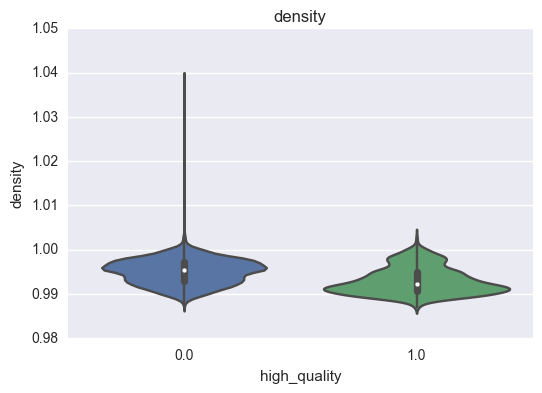

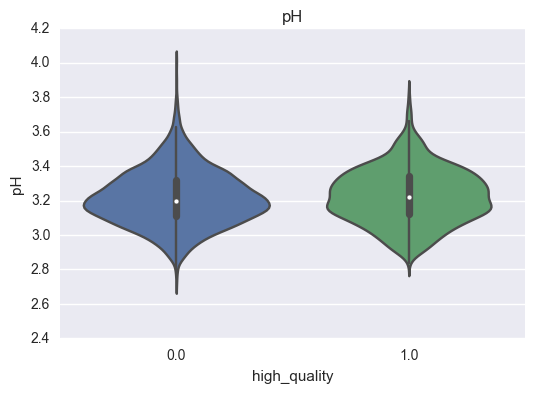

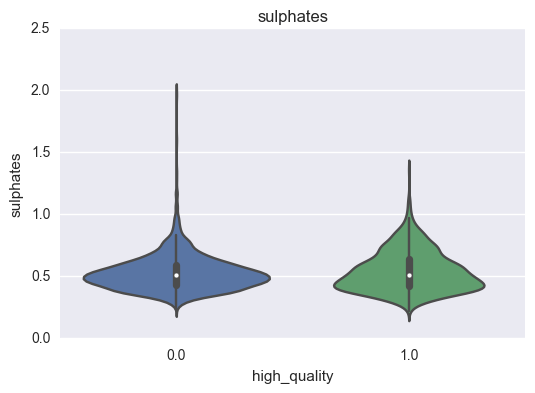

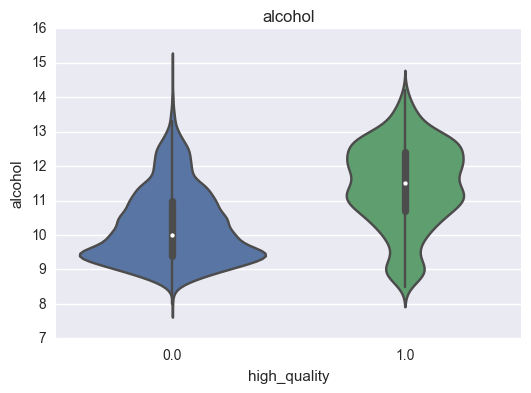

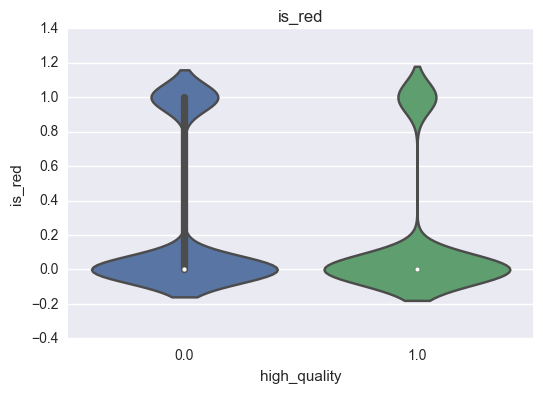

In [10]:
for i in wine.columns[:-1:]:
    sns.violinplot(x='high_quality', y=i, data = df)
    plt.title(i)
    plt.show()

In [45]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,is_red,high_quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.486740,-0.049447
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.653036,-0.151714
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.187397,0.054444
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.348821,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.512678,-0.161781
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.471644,0.014767
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.700357,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.390645,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.329129,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.487218,0.033971


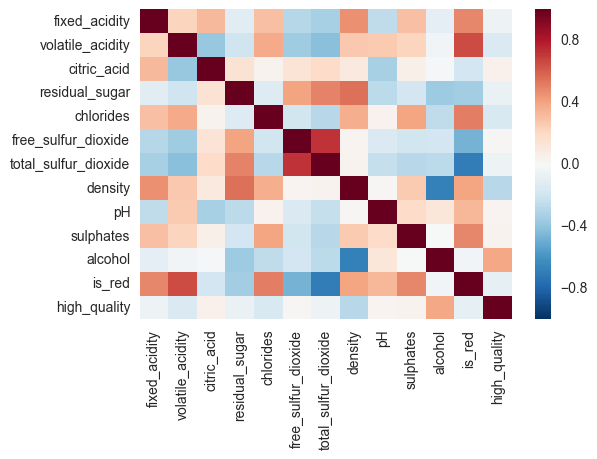

In [46]:
sns.heatmap(wine.corr())

In [5]:
# TODO

#### Build K-Nearest Neighbors model to predict whether or not a wine is high quality
- Select features you think will be predictive of high quality wines
- Scale the dataset (remember, this is so that each variable contributes equally to the distance computation)
- Evaluate the accuracy of your model using cross-validation
- Evaluate different values of `n` to see how the number of neighbors affects the classification accuracy

In [28]:
# TODO
from sklearn import neighbors, cross_validation, preprocessing

In [27]:
#WITHOUT NORMALIZATION, JUST FOR CURIOSITY
X = wine.iloc[:, :-1]
y = wine.iloc[:,-1]
neigh_model = neighbors.KNeighborsClassifier()
neigh_model.fit(X, y)
print 'score', neigh_model.score(X, y)
# Cross validation
cross_validation.cross_val_score(neigh_model, X, y, cv=5)

score 0.87086347545


array([ 0.80384615,  0.77538462,  0.77598152,  0.75904542,  0.7213241 ])

In [58]:
# Normalized with min-max scale
X = preprocessing.minmax_scale(wine.iloc[:, :-1])
y = wine.iloc[:,-1]
neigh_model = neighbors.KNeighborsClassifier(n_neighbors=5)
neigh_model.fit(X, y)
print 'score', neigh_model.score(X, y)
# Cross validation
print cross_validation.cross_val_score(neigh_model, X, y, cv=5)
print cross_validation.cross_val_score(neigh_model, X, y, cv=5).mean()

score 0.89195013083
[ 0.81538462  0.79769231  0.8052348   0.78598922  0.73441109]
0.787742405401


In [50]:
# Normalized
X = preprocessing.normalize(wine.iloc[:, :-1])
y = wine.iloc[:,-1]
neigh_model = neighbors.KNeighborsClassifier(n_neighbors=3)
neigh_model.fit(X, y)
print 'score', neigh_model.score(X, y)
# Cross validation
print cross_validation.cross_val_score(neigh_model, X, y, cv=5)
print cross_validation.cross_val_score(neigh_model, X, y, cv=5).mean()

score 0.905033092196
[ 0.80230769  0.76230769  0.76366436  0.73133179  0.68514242]
0.748950790549


In [37]:
# Standardized
X = preprocessing.scale(wine.iloc[:, :-1])
y = wine.iloc[:,-1]
neigh_model = neighbors.KNeighborsClassifier()
neigh_model.fit(X, y)
print 'score', neigh_model.score(X, y)
# Cross validation
print cross_validation.cross_val_score(neigh_model, X, y, cv=5)
print cross_validation.cross_val_score(neigh_model, X, y, cv=5).mean()

score 0.897952901339
[ 0.81846154  0.78461538  0.79753657  0.79060816  0.74056967]
0.786358263753


In [43]:
preprocessing.minmax_scale(wine.iloc[:,0])

array([ 0.29752066,  0.33057851,  0.33057851, ...,  0.2231405 ,
        0.14049587,  0.18181818])

In [41]:
((wine.iloc[:,0]-wine.iloc[:,0].min())/(wine.iloc[:,0].max() - wine.iloc[:,0].min()))

0       0.297521
1       0.330579
2       0.330579
3       0.611570
4       0.297521
5       0.297521
6       0.338843
7       0.289256
8       0.330579
9       0.305785
10      0.239669
11      0.305785
12      0.148760
13      0.330579
14      0.421488
15      0.421488
16      0.388430
17      0.355372
18      0.297521
19      0.338843
20      0.421488
21      0.314050
22      0.338843
23      0.388430
24      0.256198
25      0.206612
26      0.314050
27      0.338843
28      0.272727
29      0.330579
          ...   
6467    0.165289
6468    0.231405
6469    0.190083
6470    0.099174
6471    0.181818
6472    0.157025
6473    0.148760
6474    0.297521
6475    0.198347
6476    0.173554
6477    0.198347
6478    0.231405
6479    0.231405
6480    0.099174
6481    0.140496
6482    0.090909
6483    0.223140
6484    0.231405
6485    0.198347
6486    0.198347
6487    0.247934
6488    0.090909
6489    0.190083
6490    0.157025
6491    0.223140
6492    0.198347
6493    0.231405
6494    0.2231

In [42]:
print wine.iloc[:,0]
print wine.iloc[:,0].min()
print wine.iloc[:,0].max()

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
5        7.4
6        7.9
7        7.3
8        7.8
9        7.5
10       6.7
11       7.5
12       5.6
13       7.8
14       8.9
15       8.9
16       8.5
17       8.1
18       7.4
19       7.9
20       8.9
21       7.6
22       7.9
23       8.5
24       6.9
25       6.3
26       7.6
27       7.9
28       7.1
29       7.8
        ... 
6467     5.8
6468     6.6
6469     6.1
6470     5.0
6471     6.0
6472     5.7
6473     5.6
6474     7.4
6475     6.2
6476     5.9
6477     6.2
6478     6.6
6479     6.6
6480     5.0
6481     5.5
6482     4.9
6483     6.5
6484     6.6
6485     6.2
6486     6.2
6487     6.8
6488     4.9
6489     6.1
6490     5.7
6491     6.5
6492     6.2
6493     6.6
6494     6.5
6495     5.5
6496     6.0
Name: fixed_acidity, dtype: float64
3.8
15.9
